In [ ]:
# Basically this is to import our google drive
from google.colab import drive
drive.mount("/content/drive")
drive.mount("/content/drive", force_remount=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Mounted at /content/drive


In [ ]:
# Importing libraries we might need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importing our dataset and formatting it due to empty column and junk row
Data = pd.read_csv("/content/Python_SalesData.xlsx - Raw.csv", header=0, skiprows=1)
Data = Data.drop(Data.columns[0], axis=1)
Data

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City
0,10452,7/11/2022,Fries,3.49,573.07,Online,Gift Card,Tom Jackson,London
1,10453,7/11/2022,Beverages,2.95,745.76,Online,Gift Card,Pablo Perez,Madrid
2,10454,7/11/2022,Sides & Other,4.99,200.40,In-store,Gift Card,Joao Silva,Lisbon
3,10455,8/11/2022,Burgers,12.99,569.67,In-store,Credit Card,Walter Muller,Berlin
4,10456,8/11/2022,Chicken Sandwiches,9.95,201.01,In-store,Credit Card,Walter Muller,Berlin
...,...,...,...,...,...,...,...,...,...
249,10709,28/12/2022,Sides & Other,4.99,200.40,Drive-thru,Gift Card,Walter Muller,Berlin
250,10710,29/12/2022,Burgers,12.99,754.43,Drive-thru,Gift Card,Walter Muller,Berlin
251,10711,29/12/2022,Chicken Sandwiches,9.95,281.41,Drive-thru,Gift Card,Walter Muller,Berlin
252,10712,29/12/2022,Fries,3.49,630.37,Drive-thru,Gift Card,Walter Muller,Berlin


In [ ]:
# To get the Number of rows and columns in our dataset
row, column = Data.shape
print("rows :" ,row, "columns: ", column)

rows : 254 columns:  9


In [ ]:
# To get the number of non-null values and the data types in our columns
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        254 non-null    int64  
 1   Date            254 non-null    object 
 2   Product         254 non-null    object 
 3   Price           254 non-null    float64
 4   Quantity        254 non-null    float64
 5   Purchase Type   254 non-null    object 
 6   Payment Method  254 non-null    object 
 7   Manager         254 non-null    object 
 8   City            254 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 18.0+ KB


In [ ]:
# Quick description of our numerical colums
Data.describe()

,Order ID,Price,Quantity
count,254.000000,254.000000,254.000000
mean,10584.133858,7.102323,460.611457
std,75.889181,4.341855,214.888699
min,10452.000000,2.950000,200.400000
25%,10520.250000,3.490000,201.010000
50%,10583.500000,4.990000,538.880000
75%,10649.750000,9.950000,677.440000
max,10713.000000,29.050000,754.430000


In [ ]:
# Checking the number of unique items in our columns
Data.nunique().reset_index(name="Number")

,index,Number
0,Order ID,254
1,Date,53
2,Product,5
3,Price,7
4,Quantity,29
5,Purchase Type,3
6,Payment Method,3
7,Manager,14
8,City,5


In [ ]:
# To see the top of dataset to remember what we are working with
Data.head(3)

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City
0,10452,7/11/2022,Fries,3.49,573.07,Online,Gift Card,Tom Jackson,London
1,10453,7/11/2022,Beverages,2.95,745.76,Online,Gift Card,Pablo Perez,Madrid
2,10454,7/11/2022,Sides & Other,4.99,200.40,In-store,Gift Card,Joao Silva,Lisbon


In [ ]:
# 1. The most prefered payment method
preferred_pm = Data['Payment Method'].value_counts().reset_index() #try without the .reset_index()
preferred_pm.index = ["i","ii", "iii"]
print("Most preferred payment method: \n", preferred_pm)

Most preferred payment method: 
     Payment Method  count
i      Credit Card    120
ii            Cash     76
iii      Gift Card     58


In [ ]:
# 2. Which one was the Most Selling Product by Quantity and by Revenue?
most_selling_by_quantity = Data.groupby('Product')['Quantity'].sum().reset_index()
most_selling_by_quantity.index = ['i','ii','iii','iv','v']
print("Most selling product by Quantity: \n", most_selling_by_quantity)
print("________________________________________________________________")
Data['Revenue'] = Data['Price'] * Data['Quantity']
most_selling_by_revenue = Data.groupby('Product')['Revenue'].sum().reset_index(name="Revenue ($)")
most_selling_by_revenue.index = ['i','ii','iii','iv','v']
print("Most selling product by Revenue: \n", most_selling_by_revenue)

Most selling product by Quantity: 
                 Product  Quantity
i             Beverages  34983.14
ii              Burgers  29022.31
iii  Chicken Sandwiches  11135.92
iv                Fries  32034.34
v         Sides & Other   9819.60
________________________________________________________________
Most selling product by Revenue: 
                 Product  Revenue ($)
i             Beverages  103200.2630
ii              Burgers  376999.8069
iii  Chicken Sandwiches  114641.6950
iv                Fries  125674.2903
v         Sides & Other   48999.8040


In [ ]:
# 3. Which City had maximum revenue, and Which Manager earned maximum revenue?
maximum_revenue = Data.groupby('City')['Revenue'].sum().reset_index(name="Revenue ($)")
max_city = maximum_revenue.loc[maximum_revenue['Revenue ($)'].idxmax()]
print("City with the maximum revenue:\n", max_city)
print("________________________________________________________________")
manager_maximum_revenue = Data.groupby('Manager')['Revenue'].sum().reset_index(name="Revenue ($)")
max_manager = manager_maximum_revenue.loc[manager_maximum_revenue['Revenue ($)'].idxmax()]
print("City with the maximum revenue: \n", manager_maximum_revenue)

City with the maximum revenue:
 City                Lisbon
Revenue ($)    241714.1157
Name: 1, dtype: object
________________________________________________________________
City with the maximum revenue: 
                Manager  Revenue ($)
0          Pablo Perez   23200.0330
1           Remy Monet    4000.0258
2        Joao    Silva   16639.3492
3           Joao Silva  225074.7665
4       Pablo    Perez     999.9960
5        Pablo   Perez    2199.9913
6         Pablo  Perez    2199.9913
7          Pablo Perez  107600.2549
8       Remy     Monet     999.9960
9        Remy    Monet    2000.0143
10          Remy Monet   72800.2690
11    Tom      Jackson    2000.0143
12         Tom Jackson  209201.0263
13       Walter Muller  100600.1313


In [ ]:
# 4. What was the Average Revenue?
Average_revenue = Data["Revenue"].mean()
print("The Average Revenue: \n", Average_revenue)

The Average Revenue: 
 3029.589996850394


In [ ]:
# 5. What was the Average Revenue of November & December?
Data['Date'] = pd.to_datetime(Data['Date'], dayfirst=True) # Convert Date column to datetime
NovDec = Data[Data['Date'].dt.month.isin([11,12])] # Filter November and December
AvRevNovDec = NovDec["Revenue"].mean() # Calculate average revenue for Nov & Dec combined
print(f"The Average Revenue of November & December: \n {AvRevNovDec:.2f}")

The Average Revenue of November & December: 
 3029.59


In [ ]:
# 6. What was the Standard Deviation of Revenue and Quantity?
STD_DEV = Data[['Revenue', 'Quantity']].std()
print("Standard Deviation of Revenue and Quantity: \n", STD_DEV)

Standard Deviation of Revenue and Quantity: 
 Revenue     2420.118378
Quantity     214.888699
dtype: float64


In [ ]:
# 7. What was the Variance of Revenue and Quantity?
var = Data[['Revenue', 'Quantity']].var()
print("Standard Deviation of Revenue and Quantity: \n", var)

Standard Deviation of Revenue and Quantity: 
 Revenue     5.856973e+06
Quantity    4.617715e+04
dtype: float64


In [ ]:
# 8. Was the revenue increasing or decreasing over the time?
RevTrend = Data.groupby('Date')['Revenue'].sum().reset_index()
print("Revenue Trend: \n", RevTrend)

Revenue Trend: 
          Date     Revenue
0  2022-11-07   5200.0023
1  2022-11-08  12400.0731
2  2022-11-09  14200.0386
3  2022-11-10  13200.0426
4  2022-11-11  14400.0156
5  2022-11-12  14000.0535
6  2022-11-13  27674.4512
7  2022-11-14  17839.3445
8  2022-11-15  13600.0305
9  2022-11-16  13600.0305
10 2022-11-17  14000.0535
11 2022-11-18  14400.1114
12 2022-11-19  14000.0194
13 2022-11-20   8200.0466
14 2022-11-21  14000.0838
15 2022-11-22  13599.9918
16 2022-11-23  13800.0378
17 2022-11-24  13600.0259
18 2022-11-25  13399.9799
19 2022-11-26  13200.0638
20 2022-11-27  13399.9799
21 2022-11-28  13400.0454
22 2022-11-29  13400.0454
23 2022-11-30  13600.0914
24 2022-12-01  13400.1144
25 2022-12-02  14000.0535
26 2022-12-03  14000.0535
27 2022-12-04   9000.1007
28 2022-12-05  14200.0386
29 2022-12-06  14000.1225
30 2022-12-07  14000.0535
31 2022-12-08  14200.0995
32 2022-12-09  14600.0616
33 2022-12-10  14600.0616
34 2022-12-11  15000.0881
35 2022-12-12  14600.0616
36 2022-12-13  14600.

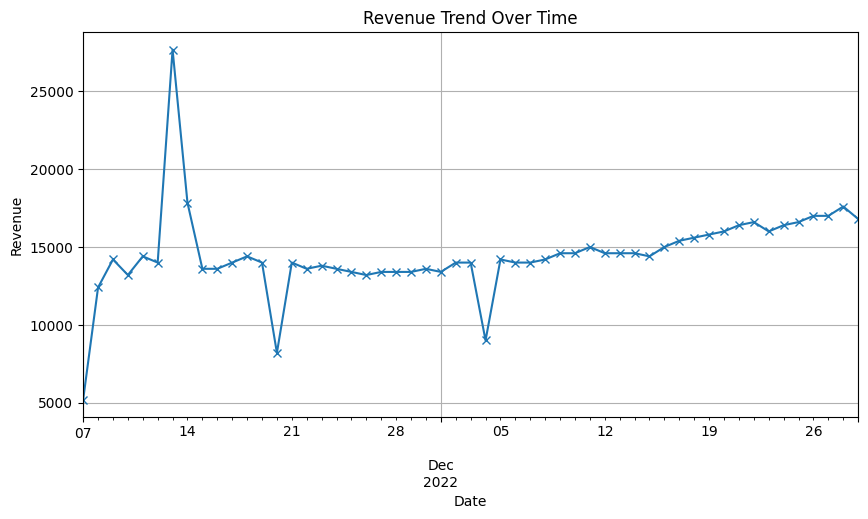

In [ ]:
# 8b.
RevTrend = Data.groupby('Date')['Revenue'].sum()

plt.figure(figsize=(10,5))
RevTrend.plot(marker='x')
plt.title('Revenue Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

In [ ]:
# 9. What was the Average 'Quantity Sold' & 'Average Revenue' for each  product?
AverageQS_R = Data.groupby('Product')[['Quantity','Revenue']].mean().reset_index().rename(columns={'Quantity': 'Avg_Quantity_Sold', 'Revenue': 'Avg_Revenue'})
print("Average Quantity Sold & Average Revenue for each product: \n", AverageQS_R)

Average Quantity Sold & Average Revenue for each product: 
               Product  Avg_Quantity_Sold  Avg_Revenue
0           Beverages         699.662800  2064.005260
1             Burgers         558.121346  7249.996287
2  Chicken Sandwiches         214.152308  2204.647981
3               Fries         628.124314  2464.201771
4       Sides & Other         200.400000   999.996000


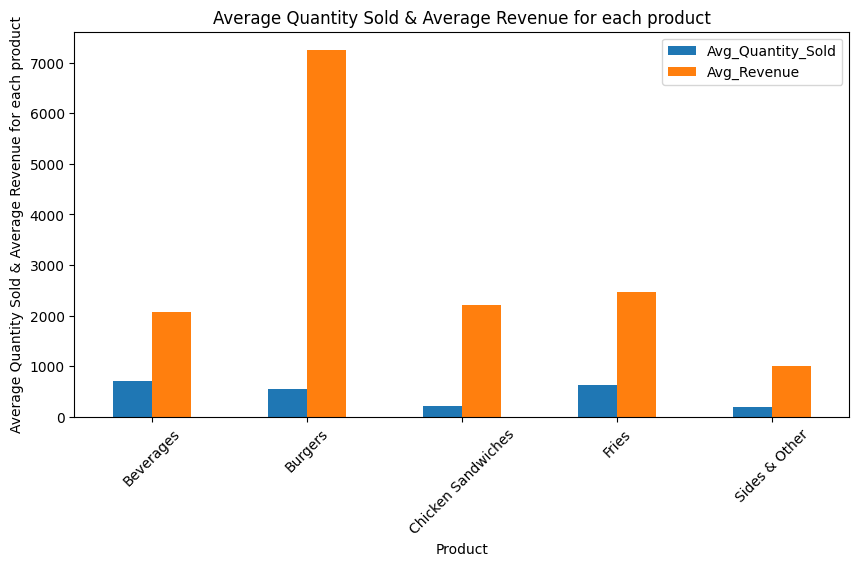

In [ ]:
AverageQS_R.plot(x='Product', y=['Avg_Quantity_Sold','Avg_Revenue'], kind="bar", figsize=(10,5))

plt.title('Average Quantity Sold & Average Revenue for each product')
plt.xlabel('Product')
plt.ylabel('Average Quantity Sold & Average Revenue for each product')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# 10. What was the total number of orders or sales made?
total_orders = len(Data)
print("total number of orders: \n", total_orders)

total number of orders: 
 254
